**Importing Libraries**

In [3]:
import tensorflow as tf

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Importing Libraries
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np

**Classification Using ImageNet**

Instructions for updating:
Colocations handled automatically by placer.


14536120/14536120 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


35363/35363 [==============================] - 0s 0us/step
German_shepherd: 86.11%
Airedale: 3.88%
malinois: 0.96%
muzzle: 0.47%
bloodhound: 0.39%


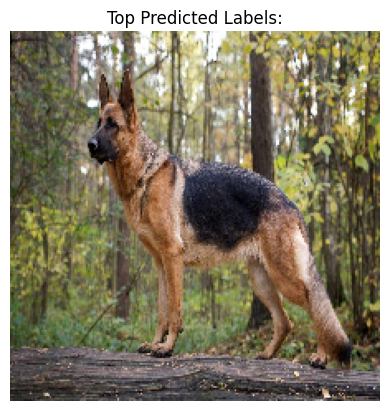

In [4]:
# Load the MobileNetV2 model pre-trained on ImageNet
model = MobileNetV2(weights='imagenet')

# Load and preprocess the animal image
animal_image_path = "gs.jpg"  # Replace with the actual path of your animal image
img = image.load_img(animal_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction using the pre-trained model
prediction = model.predict(img_array)
predicted_labels = decode_predictions(prediction, top=5)[0]

# Display the image and top predicted labels
plt.imshow(img)
plt.title("Top Predicted Labels:")
for label in predicted_labels:
    print(f"{label[1]}: {label[2]*100:.2f}%")
plt.axis('off')
plt.show()


**Fast Gradient Attack**

Airedale: 88.79%
Lakeland_terrier: 3.60%
wire-haired_fox_terrier: 0.26%
Kerry_blue_terrier: 0.16%
Irish_terrier: 0.11%


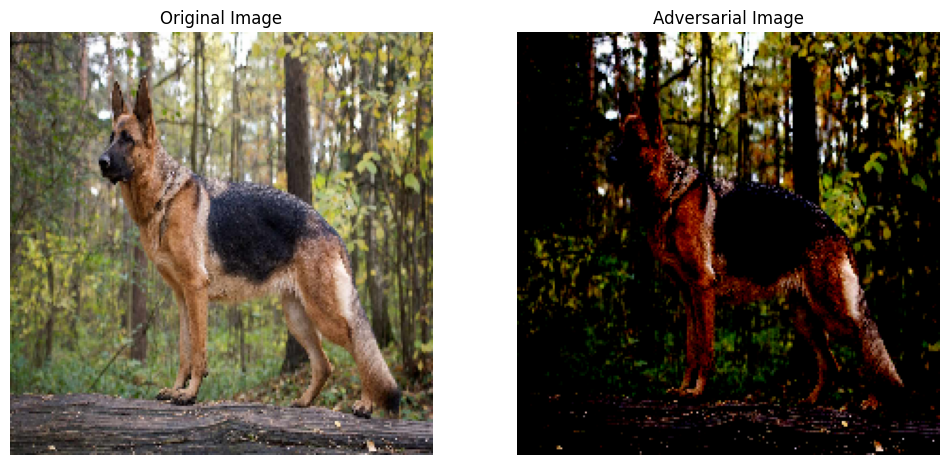

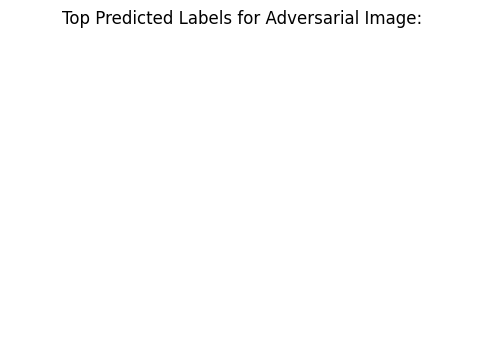

In [5]:
classifier = KerasClassifier(model=model)

# Create the FGM attack
attack = FastGradientMethod(estimator=classifier, eps=0.01)

# Generate the adversarial image
adversarial_image = attack.generate(x=img_array)

# Make a prediction using the pre-trained model for the adversarial image
adversarial_prediction = model.predict(adversarial_image)
adversarial_predicted_labels = decode_predictions(adversarial_prediction, top=5)[0]

# Display the original and adversarial images with their top predicted labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(adversarial_image))
plt.title("Adversarial Image")
plt.axis('off')

plt.figure(figsize=(6, 4))
plt.title("Top Predicted Labels for Adversarial Image:")
for label in adversarial_predicted_labels:
    print(f"{label[1]}: {label[2]*100:.2f}%")
plt.axis('off')

plt.show()